---
embed-resources: true
echo: false
execute:
  enabled: true
---

# Predicting Student Age Using Adaptability and Demographic Factors


Ritsika Medury

**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [3]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


## 1. Introduction

### Research Goal Statement:

My primary research goal is to build a predictive model to effectively predict the Age of a student for new datasets using features such as education level, gender, institution type, financial condition, adaptability level and device used. Through this model I hope to understand what factors influence the age distribution of students in online or blended learning environments.

This model will be using the following explanatory variables:

- Education Level
- Gender
- Institution Type
- Financial Condition
- Device
- Adaptability Level

Secondary Research Goal: Ideally, we would like for our chosen model to also yield reliable interpretative insights about the nature of the relationship between the variables in the dataset. Specifically, we aim to understand how different features such as access to resources, learning environment, and education level relate to a student’s age in the context of adaptability to online learning.

### Research Motivation:

Understanding what factors are associated with student age is useful when designing age-appropriate learning strategies, tools, and support systems. A predictive model that estimates a student’s age based on their learning environment and access to technology can help educators, content creators, and edtech companies personalise digital learning experiences.

A model like this can be really helpful for someone trying to estimate the age group of a student cohort when only certain features (like school type, devices used, or learning preferences) are available. Teachers, curriculum designers, and school administrators can benefit with this model when developing targeted learning plans or digital resources.


## 2. Dataset Discussion

In [4]:
df = pd.read_csv("students_adaptability.csv")
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,23,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,23,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,18,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,13,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,18,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,18,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,18,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,13,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,18,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [5]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,23,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,23,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,18,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,13,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,18,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [6]:
df.shape[0]

1205

I found this dataset from Kaggle, a public website for datasets. I downloaded the csv file right before starting my mini project on 3 April 2025.
https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

Original Dataset Information: 
This Dataset contains information on Amazon's Top 50 bestselling books from 2009 to 2019. It contains 550 books, data has been categorized into fiction and non-fiction using Goodreads.


## 3. Dataset Cleaning

I modified the original csv file to change ranges of Age to a single numerical value so that it can be predicted. 

In [7]:
df = df.rename(columns={'Education Level': 'Education_Level'})
df = df.rename(columns={'Institution Type': 'Institution_Type'})
df = df.rename(columns={'Financial Condition': 'Financial_Condition'})
df = df.rename(columns={'Adaptivity Level': 'Adaptivity_Level'})

I began by changing the names of the columns to remove space since it might cause confusion

In [8]:
df = df[["Gender", "Age", "Education_Level", "Institution_Type", "Financial_Condition", "Device", "Adaptivity_Level"]]
df

,Gender,Age,Education_Level,Institution_Type,Financial_Condition,Device,Adaptivity_Level
0,Boy,23,University,Non Government,Mid,Tab,Moderate
1,Girl,23,University,Non Government,Mid,Mobile,Moderate
2,Girl,18,College,Government,Mid,Mobile,Moderate
3,Girl,13,School,Non Government,Mid,Mobile,Moderate
4,Girl,18,School,Non Government,Poor,Mobile,Low
...,...,...,...,...,...,...,...
1200,Girl,18,College,Non Government,Mid,Mobile,Low
1201,Girl,18,College,Non Government,Mid,Mobile,Moderate
1202,Boy,13,School,Non Government,Mid,Mobile,Moderate
1203,Girl,18,College,Non Government,Mid,Mobile,Low


Next I only included the columns that we will be needing to predict Age. 

In [9]:
df.dtypes

Gender                 object
Age                     int64
Education_Level        object
Institution_Type       object
Financial_Condition    object
Device                 object
Adaptivity_Level       object
dtype: object

In [10]:
df = df.dropna()

In [11]:
df.shape[0]

1205

This tells us that this dataset had no na_values. 

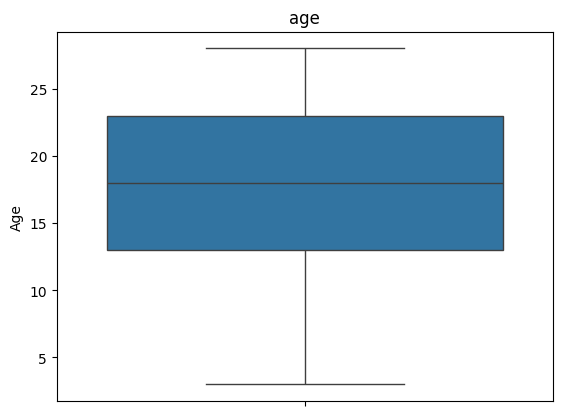

In [12]:
sns.boxplot(df["Age"])
plt.title("age")
plt.show()

I see no outliers to remove. 

In [13]:
df['Adaptivity_Level'] = df['Adaptivity_Level'].replace('Low', 1)
df['Adaptivity_Level'] = df['Adaptivity_Level'].replace('Moderate', 2)
df['Adaptivity_Level'] = df['Adaptivity_Level'].replace('High', 3)
df

/var/folders/3s/_n5zhr2n3nlfg4nf9t3r20q80000gn/T/ipykernel_65252/266141294.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Adaptivity_Level'] = df['Adaptivity_Level'].replace('High', 3)


,Gender,Age,Education_Level,Institution_Type,Financial_Condition,Device,Adaptivity_Level
0,Boy,23,University,Non Government,Mid,Tab,2
1,Girl,23,University,Non Government,Mid,Mobile,2
2,Girl,18,College,Government,Mid,Mobile,2
3,Girl,13,School,Non Government,Mid,Mobile,2
4,Girl,18,School,Non Government,Poor,Mobile,1
...,...,...,...,...,...,...,...
1200,Girl,18,College,Non Government,Mid,Mobile,1
1201,Girl,18,College,Non Government,Mid,Mobile,2
1202,Boy,13,School,Non Government,Mid,Mobile,2
1203,Girl,18,College,Non Government,Mid,Mobile,1


I changed the words in `Adaptivity_Level` to numbers so the model can understand and work with them. Since "Low", "Moderate", and "High" have an order, turning them into 1, 2, and 3 helps the model see that. It also makes it easier to plot and find patterns with age.

## 4. Preliminary Analysis

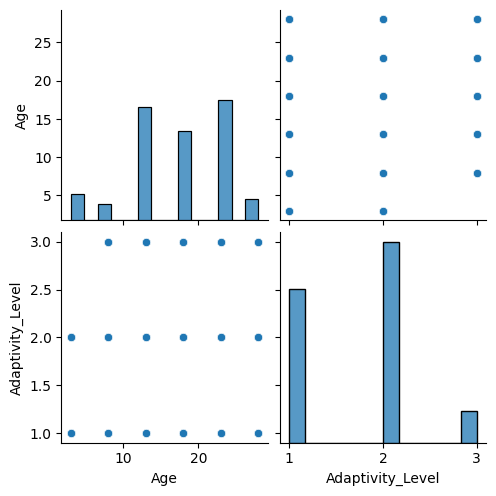

In [14]:
sns.pairplot(df)
plt.show()

In [15]:
model = smf.ols(formula= "Age ~ Gender + Education_Level + Institution_Type + Financial_Condition + Device + Adaptivity_Level", data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     428.4
Date:                Mon, 05 Jan 2026   Prob (F-statistic):               0.00
Time:                        17:11:04   Log-Likelihood:                -3056.0
No. Observations:                1205   AIC:                             6132.
Df Residuals:                    1195   BIC:                             6183.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             20.0721      0.454     44.220      0.000      19.182      20.963
Gender[T.Girl]                        -1.1572      0.186     -6.234      0.000      -1.521      -0.793
Education_Level[T.School]             -6.6896      0.270    -24.818      0.000      -7.218      -6.161
Education_Level[T.University]          4.8612      0.275     17.647      0.000       4.321       5.402
Institution_Type[T.Non Government]    -1.2385      0.215     -5.769      0.000      -1.660      -0.817
Financial_Condition[T.Poor]           -0.2395      0.229     -1.046      0.296      -0.689       0.210
Financial_Condition[T.Rich]            0.6717      0.373      1.798      0.072      -0.061       1.404
Device[T.Mobile]                      -0.0537      0.300     -0.179      0.858      -0.642       0.535
Device[T.Tab]                         -0.1786      0.611     -0.292      0.770      -1.378       1.021
Adaptivity_Level                      -0.1975      0.160     -1.232      0.218      -0.512       0.117
==============================================================================
Omnibus:                      149.770   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.352
Skew:                          -0.844   Prob(JB):                     1.06e-52
Kurtosis:                       4.384   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

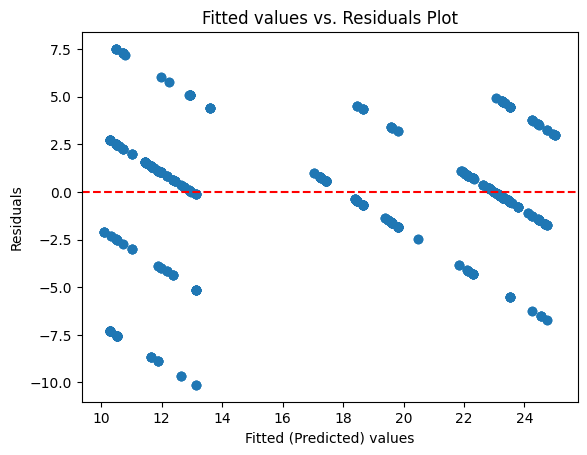

In [16]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

Yes, I believe there may be some benefit in transforming one or more variables before fitting the linear regression model. This we can see the range of Age is a lot more broader than range for Adaptivity Level. 

Although my dependent variable `Age` is already numerical, most of my explanatory variables are categorical. Categorical variables are typically 0/1 encoded or transformed into dummy variables but this depends on the model you choose particularly regularized or non-regularized. 

The residuals vs. fitted values plot for the original model has a visible pattern in the residuals, the spread is relatively symmetric around zero. Which is why I believe retaining the original, untransformed variables in the model is good enough. 


### Interaction Terms

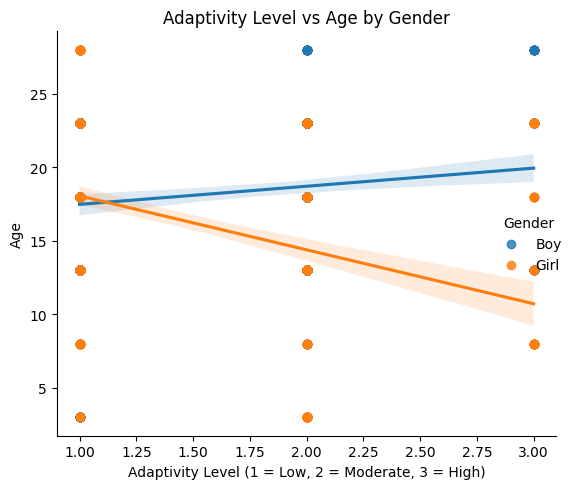

In [17]:
sns.lmplot(data=df, x='Adaptivity_Level', y='Age', hue='Gender')
plt.title('Adaptivity Level vs Age by Gender')
plt.xlabel('Adaptivity Level (1 = Low, 2 = Moderate, 3 = High)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

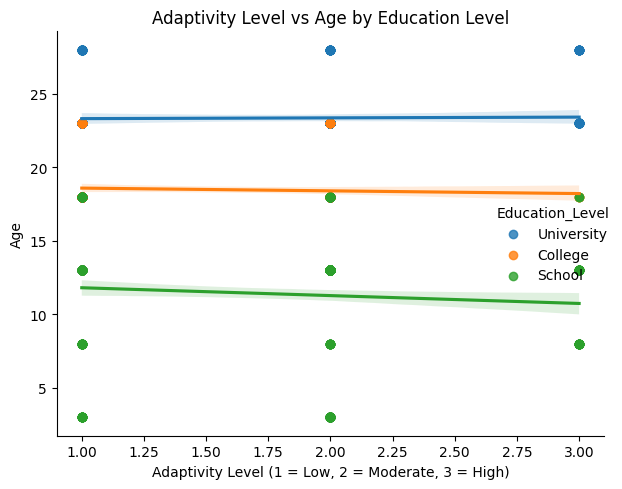

In [18]:
sns.lmplot(data=df, x='Adaptivity_Level', y='Age', hue='Education_Level')
plt.title('Adaptivity Level vs Age by Education Level')
plt.xlabel('Adaptivity Level (1 = Low, 2 = Moderate, 3 = High)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


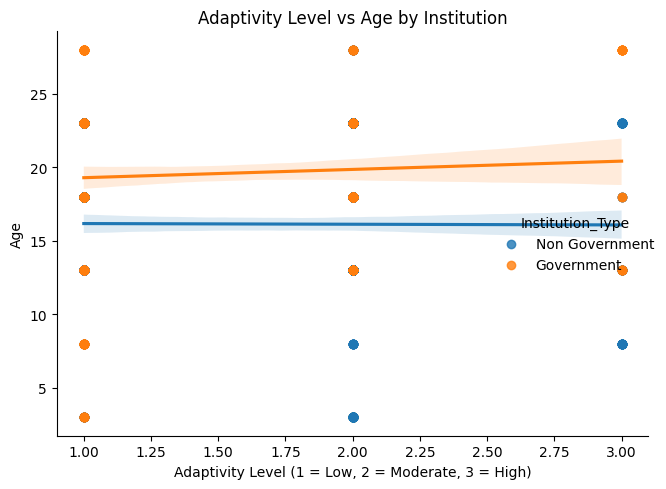

In [19]:
sns.lmplot(data=df, x='Adaptivity_Level', y='Age', hue='Institution_Type')
plt.title('Adaptivity Level vs Age by Institution')
plt.xlabel('Adaptivity Level (1 = Low, 2 = Moderate, 3 = High)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

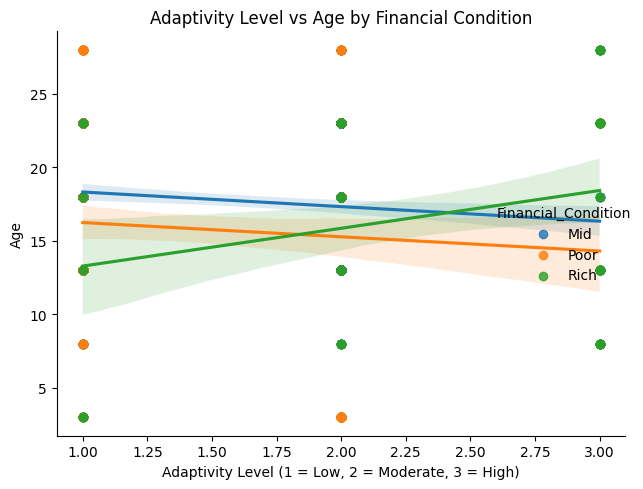

In [20]:
sns.lmplot(data=df, x='Adaptivity_Level', y='Age', hue='Financial_Condition')
plt.title('Adaptivity Level vs Age by Financial Condition')
plt.xlabel('Adaptivity Level (1 = Low, 2 = Moderate, 3 = High)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

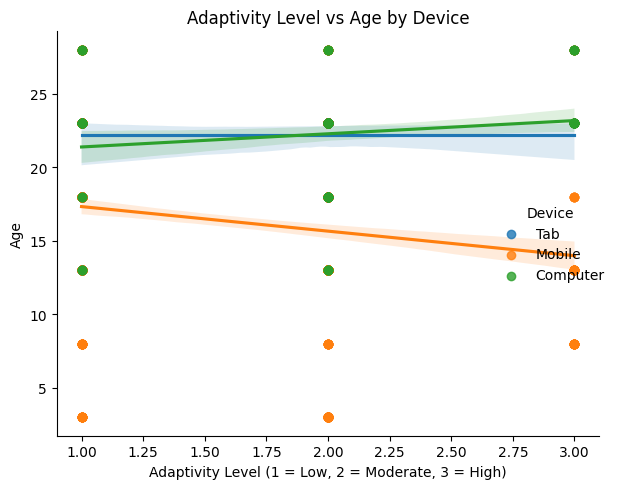

In [21]:
sns.lmplot(data=df, x='Adaptivity_Level', y='Age', hue='Device')
plt.title('Adaptivity Level vs Age by Device')
plt.xlabel('Adaptivity Level (1 = Low, 2 = Moderate, 3 = High)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

There is an extremely large interaction between how gender and adaptivity level predict age since the sloes go upward for boys and downwards for girls. For categorical variables like Institutional Level and Educational LEvel, the slops are pretty much flat and parallel. Other categorical variables also have slight interaction but not as high as gender and adaptivity level.

## 5. Predictive Models

Since I do not plan on using a regularization model I will not be creating  own 0/1 indicator explanatory variables.

In [22]:
# Train-Test split method
df_train, df_test = train_test_split(df, test_size=0.2, random_state=123)
df_train.head()

,Gender,Age,Education_Level,Institution_Type,Financial_Condition,Device,Adaptivity_Level
351,Girl,28,University,Government,Poor,Mobile,1
1022,Girl,13,School,Non Government,Mid,Mobile,2
431,Girl,28,University,Government,Poor,Computer,1
1049,Girl,13,School,Non Government,Poor,Mobile,2
278,Boy,23,University,Non Government,Poor,Mobile,1


In [23]:
scaler = StandardScaler()
scaler_exp_vars = scaler.fit_transform(df_train[["Adaptivity_Level", "Age"]])

df_train[["Adaptivity_Level", "Age"]] = pd.DataFrame(scaler_exp_vars, columns=[df_train[["Adaptivity_Level", "Age"]].columns], index=df_train.index)
df_train

,Gender,Age,Education_Level,Institution_Type,Financial_Condition,Device,Adaptivity_Level
351,Girl,1.698217,University,Government,Poor,Mobile,-1.102783
1022,Girl,-0.692846,School,Non Government,Mid,Mobile,0.520244
431,Girl,1.698217,University,Government,Poor,Computer,-1.102783
1049,Girl,-0.692846,School,Non Government,Poor,Mobile,0.520244
278,Boy,0.901196,University,Non Government,Poor,Mobile,-1.102783
...,...,...,...,...,...,...,...
96,Boy,-0.692846,School,Non Government,Mid,Mobile,0.520244
1147,Girl,-0.692846,School,Non Government,Mid,Mobile,0.520244
106,Girl,-0.692846,School,Non Government,Mid,Mobile,0.520244
1041,Girl,0.901196,University,Non Government,Mid,Tab,0.520244


In [24]:
df_train[["Adaptivity_Level", "Age"]].std()

Adaptivity_Level    1.000519
Age                 1.000519
dtype: float64

In [25]:
df_train[["Adaptivity_Level", "Age"]].mean()

Adaptivity_Level   -2.211233e-17
Age                -8.937065e-17
dtype: float64

In [26]:
scaler = StandardScaler()
scaler_exp_vars = scaler.fit_transform(df_test[["Adaptivity_Level", "Age"]])

df_test[["Adaptivity_Level", "Age"]] = pd.DataFrame(scaler_exp_vars, columns=[df_test[["Adaptivity_Level", "Age"]].columns], index=df_test.index)
df_test

,Gender,Age,Education_Level,Institution_Type,Financial_Condition,Device,Adaptivity_Level
310,Girl,-2.178377,School,Non Government,Poor,Mobile,0.471514
35,Girl,0.998560,University,Non Government,Mid,Mobile,0.471514
1156,Boy,0.204326,College,Government,Mid,Mobile,0.471514
138,Girl,-2.178377,School,Non Government,Poor,Mobile,0.471514
203,Boy,0.998560,University,Non Government,Mid,Mobile,0.471514
...,...,...,...,...,...,...,...
691,Boy,-0.589908,School,Non Government,Mid,Mobile,0.471514
613,Boy,0.998560,University,Government,Mid,Mobile,-1.128976
1120,Girl,-0.589908,School,Non Government,Mid,Mobile,0.471514
517,Boy,0.998560,University,Non Government,Rich,Computer,2.072004


In [27]:
df_test[["Adaptivity_Level", "Age"]].std()

Adaptivity_Level    1.002081
Age                 1.002081
dtype: float64

In [28]:
df_test[["Adaptivity_Level", "Age"]].mean()

Adaptivity_Level    1.289886e-16
Age                -1.768986e-16
dtype: float64

### 5.1 Non-Regularized Linear Regression Full Model

In [29]:
model1 = smf.ols(formula="Age ~ Gender + Education_Level + Institution_Type + Financial_Condition + Device + Adaptivity_Level", data = df_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     343.2
Date:                Mon, 05 Jan 2026   Prob (F-statistic):          5.69e-292
Time:                        17:11:06   Log-Likelihood:                -671.81
No. Observations:                 964   AIC:                             1364.
Df Residuals:                     954   BIC:                             1412.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.3736      0.068      5.519      0.000       0.241       0.506
Gender[T.Girl]                        -0.1543      0.033     -4.698      0.000      -0.219      -0.090
Education_Level[T.School]             -1.0714      0.047    -22.685      0.000      -1.164      -0.979
Education_Level[T.University]          0.7922      0.048     16.491      0.000       0.698       0.886
Institution_Type[T.Non Government]    -0.2066      0.038     -5.411      0.000      -0.282      -0.132
Financial_Condition[T.Poor]           -0.0052      0.041     -0.127      0.899      -0.086       0.076
Financial_Condition[T.Rich]            0.0652      0.066      0.983      0.326      -0.065       0.195
Device[T.Mobile]                      -0.0074      0.054     -0.137      0.891      -0.113       0.098
Device[T.Tab]                         -0.0473      0.109     -0.433      0.665      -0.261       0.167
Adaptivity_Level                      -0.0088      0.018     -0.497      0.620      -0.044       0.026
==============================================================================
Omnibus:                      124.562   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.224
Skew:                          -0.854   Prob(JB):                     7.42e-45
Kurtosis:                       4.463   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
y_test = df_test['Age']
y_pred_test = model1.predict(df_test)
r2_score(y_test, y_pred_test)

0.753265522359363

### 5.2 Non-Regularized Linear Regression Full Model with Interaction Terms

In [31]:
small_interaction_term_model = smf.ols(formula="Age ~ Gender + Education_Level + Institution_Type + Financial_Condition + Device + Adaptivity_Level + Adaptivity_Level*Gender", data = df_train).fit()
small_interaction_term_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.3573,0.066,5.409,0.000,0.228,0.487
Gender[T.Girl],-0.1646,0.032,-5.133,0.000,-0.228,-0.102
Education_Level[T.School],-1.0597,0.046,-22.991,0.000,-1.150,-0.969
Education_Level[T.University],0.7741,0.047,16.498,0.000,0.682,0.866
Institution_Type[T.Non Government],-0.1816,0.037,-4.856,0.000,-0.255,-0.108
Financial_Condition[T.Poor],-0.0054,0.040,-0.135,0.893,-0.084,0.073
Financial_Condition[T.Rich],0.0590,0.065,0.911,0.362,-0.068,0.186
Device[T.Mobile],-0.0082,0.053,-0.155,0.877,-0.111,0.095
Device[T.Tab],-0.0627,0.106,-0.589,0.556,-0.271,0.146
Adaptivity_Level,0.0833,0.022,3.853,0.000,0.041,0.126


In [32]:
y_test = df_test['Age']
y_pred_test = small_interaction_term_model.predict(df_test)
r2_score(y_test, y_pred_test)

0.76824065798697

### 5.3 Feature Selection OPTION A: Backwards Elimination Algorithm

In [33]:
df_train

,Gender,Age,Education_Level,Institution_Type,Financial_Condition,Device,Adaptivity_Level
351,Girl,1.698217,University,Government,Poor,Mobile,-1.102783
1022,Girl,-0.692846,School,Non Government,Mid,Mobile,0.520244
431,Girl,1.698217,University,Government,Poor,Computer,-1.102783
1049,Girl,-0.692846,School,Non Government,Poor,Mobile,0.520244
278,Boy,0.901196,University,Non Government,Poor,Mobile,-1.102783
...,...,...,...,...,...,...,...
96,Boy,-0.692846,School,Non Government,Mid,Mobile,0.520244
1147,Girl,-0.692846,School,Non Government,Mid,Mobile,0.520244
106,Girl,-0.692846,School,Non Government,Mid,Mobile,0.520244
1041,Girl,0.901196,University,Non Government,Mid,Tab,0.520244


In [34]:
#current model 

model = smf.ols(formula="Age ~ Gender + Education_Level + Institution_Type + Financial_Condition + Device + Adaptivity_Level", data = df_train).fit()

y_pred_test = model.predict(df_test)
r2_score(y_test, y_pred_test)

0.753265522359363

#### Iteration 1

In [35]:
# removing Gender
model = smf.ols(formula="Age ~ Education_Level + Institution_Type + Financial_Condition + Device + Adaptivity_Level", data = df_train).fit()

y_pred_test = model.predict(df_test)
r2_score(y_test, y_pred_test)

0.7371486282640247

In [36]:
# removing Education_Level
model = smf.ols(formula="Age ~ Gender + Institution_Type + Financial_Condition + Device + Adaptivity_Level", data = df_train).fit()

y_pred_test = model.predict(df_test)
r2_score(y_test, y_pred_test)

0.2852109806763232

In [37]:
# removing Institution_Type
model = smf.ols(formula="Age ~ Gender + Education_Level + Financial_Condition + Device + Adaptivity_Level", data = df_train).fit()

y_pred_test = model.predict(df_test)
r2_score(y_test, y_pred_test)

0.7503061937109433

In [38]:
# removing Financial_Condition
model = smf.ols(formula="Age ~ Gender + Education_Level + Institution_Type + Device + Adaptivity_Level", data = df_train).fit()

y_pred_test = model.predict(df_test)
r2_score(y_test, y_pred_test)

0.7510399638365666

In [39]:
# removing Device
model = smf.ols(formula="Age ~ Gender + Education_Level + Institution_Type + Financial_Condition + Adaptivity_Level", data = df_train).fit()

y_pred_test = model.predict(df_test)
r2_score(y_test, y_pred_test)

0.753355195872661

In [40]:
# removing Adaptivity_Level

model = smf.ols(formula="Age ~ Gender + Education_Level + Institution_Type + Financial_Condition + Device", data = df_train).fit()

y_pred_test = model.predict(df_test)
r2_score(y_test, y_pred_test)

0.7524451305262105

The candidate model that removes Device yields the highest test R^2 out of the candidate models. Furthermore this test R^2 is higher than that of the current model. So we permanently remove Device from the current model and move on to the next iteration

#### Iteration 2

In [41]:
# current model without Device
model = smf.ols(formula="Age ~ Gender + Education_Level + Institution_Type + Financial_Condition + Adaptivity_Level", data = df_train).fit()

y_pred_test = model.predict(df_test)
r2_score(y_test, y_pred_test)

0.753355195872661

In [42]:
# current model without Device and Gender
model = smf.ols(formula="Age ~ Education_Level + Institution_Type + Financial_Condition + Adaptivity_Level", data = df_train).fit()

y_pred_test = model.predict(df_test)
r2_score(y_test, y_pred_test)

0.7366893864086488

In [43]:
# current model without Device and Education_Level
model = smf.ols(formula="Age ~ Gender + Institution_Type + Financial_Condition + Adaptivity_Level", data = df_train).fit()

y_pred_test = model.predict(df_test)
r2_score(y_test, y_pred_test)

0.14848580958654434

In [44]:
# current model without Device and Institution_Type
model = smf.ols(formula="Age ~ Gender + Education_Level + Financial_Condition + Adaptivity_Level", data = df_train).fit()

y_pred_test = model.predict(df_test)
r2_score(y_test, y_pred_test)

0.7506429149664483

In [45]:
# current model without Device and Financial_Condition
model = smf.ols(formula="Age ~ Gender + Education_Level + Institution_Type + Adaptivity_Level", data = df_train).fit()

y_pred_test = model.predict(df_test)
r2_score(y_test, y_pred_test)

0.7510404622439578

In [46]:
# current model without Device and Adaptivity_Level
model = smf.ols(formula="Age ~ Gender + Education_Level + Institution_Type + Financial_Condition", data = df_train).fit()

y_pred_test = model.predict(df_test)
r2_score(y_test, y_pred_test)

0.7525294506932728

There are no candidate models that produce a test R^2 that is higher than that of the current model. So we stick with the current model and stop the algorithm

In [47]:
# Final Model
model = smf.ols(formula="Age ~ Gender + Education_Level + Institution_Type + Financial_Condition + Adaptivity_Level", data = df_train).fit()

y_pred_test = model.predict(df_test)
r2_score(y_test, y_pred_test)

0.753355195872661

## 6. Best Model Discussion

In [48]:
final_model = smf.ols(formula="Age ~ Gender + Education_Level + Institution_Type + Financial_Condition + Adaptivity_Level", data = df_train).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     442.1
Date:                Mon, 05 Jan 2026   Prob (F-statistic):          1.41e-294
Time:                        17:11:06   Log-Likelihood:                -671.91
No. Observations:                 964   AIC:                             1360.
Df Residuals:                     956   BIC:                             1399.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.3656      0.043      8.457      0.000       0.281       0.450
Gender[T.Girl]                        -0.1546      0.033     -4.750      0.000      -0.218      -0.091
Education_Level[T.School]             -1.0704      0.047    -22.850      0.000      -1.162      -0.978
Education_Level[T.University]          0.7930      0.046     17.129      0.000       0.702       0.884
Institution_Type[T.Non Government]    -0.2067      0.037     -5.521      0.000      -0.280      -0.133
Financial_Condition[T.Poor]           -0.0050      0.041     -0.121      0.904      -0.086       0.076
Financial_Condition[T.Rich]            0.0650      0.066      0.987      0.324      -0.064       0.194
Adaptivity_Level                      -0.0090      0.018     -0.512      0.609      -0.044       0.026
==============================================================================
Omnibus:                      124.153   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.446
Skew:                          -0.852   Prob(JB):                     1.10e-44
Kurtosis:                       4.461   Cond. No.                         6.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Equation:

$\hat{Age}$ =  0.3656 - 0.1546 * Gender[T.Girl] - 1.0704 * Education_Level[T.School] + 0.7930 * Education_Level[T.University] - 0.2067 * Institution_Type[T.Non Government] - 0.0050 * Financial_Condition[T.Poor]	+ 0.0650 * Financial_Condition[T.Rich] - 0.0090 * Adaptivity_Level

#### Test Dataset Fit:

This is a good fit since the the test R^2 value is greater than 0.7 namely 0.75335

#### Overfitting Explanatory Variables

The explanatory variable Device suggests overfitting since it has been removed in the algorithm. 

#### Multicollinearity

In [49]:
df_test[["Age", "Adaptivity_Level"]].corr()

,Age,Adaptivity_Level
Age,1.00000,-0.01195
Adaptivity_Level,-0.01195,1.00000


Since this dataset has only 2 numerical variables, I have found the correlation between them both age and adaptivity level which is less than 0.7 which is why this does not show multicollinearity. 

#### Slope interpretations

Yes, I can interpret the slope magnitudes now because I’ve scaled my numerical variable to be on the same scale. This way, I can fairly compare which variables have a bigger impact on predicting Age. 

Education level appears to be the strongest predictor since Being in school significantly lowers predicted age and being in  University increases it.

## 7. Conclusion

Yes, I would recommend my best model to be used by the Teachers, administrators and curriculum designers who want to understand how different student characteristics affect age, maybe to identify patterns in student maturity or progression. This is because the test R-squared value is 0.75335 which is pretty good since it is higher than 0.7. This is a strong fit for social science data.

While the model I built works quite well and gives helpful insights, I can’t say for sure that it’s the best possible model out there. There might be other versions for example I only worked with Non-regularized models while regularized models could also be used. I could use  different variable combinations, interactions, or model types—that could give a higher test R^2 value such as Lasso, Elastic Net etc. 

There are also some limitations. I only used a few features, so it’s possible that there are other important factors affecting age that I didn’t include. And while I used z-scoring for better interpretation, I didn’t test every possible transformation or interaction. Still, this model is a strong starting point and already offers useful takeaways.

### Future Work:

One idea for future work would be to include more detailed or continuous variables, like time spent studying online, number of hours using digital devices, or access to learning resources at home. These could give a more complete picture of what affects a student’s adaptability and age range. I’d also like to try using regularized models like Lasso or Ridge to see if they improve prediction and help simplify the model by automatically selecting the most important variables.